# Importing Required Libraries

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Loading the Dataset

In [267]:
# Load the data set
data = pd.read_csv("adult 3.csv")

## Data Exploration

In [268]:
# Explore Salary prediction using adult csv
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [269]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [270]:
data.shape

(48842, 15)

### Missing Value Handling

In [271]:
# Find null values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [272]:
# Checking how many missing (NaN) values are present in each column of the dataset
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [273]:
# Displaying the count of each unique category present in the 'workclass' column
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [274]:
# Replace '?' with 'Others' in workclass and print category counts
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


C:\Users\nitis\AppData\Local\Temp\ipykernel_1884\1529142321.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [275]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [276]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


C:\Users\nitis\AppData\Local\Temp\ipykernel_1884\1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


### Data Cleaning

In [277]:
# Remove 'Without-pay' and 'Never-worked' categories from workclass and print category counts
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [278]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [279]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [280]:
data.shape

(48811, 15)

In [281]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


### Outlier Detection & Removal

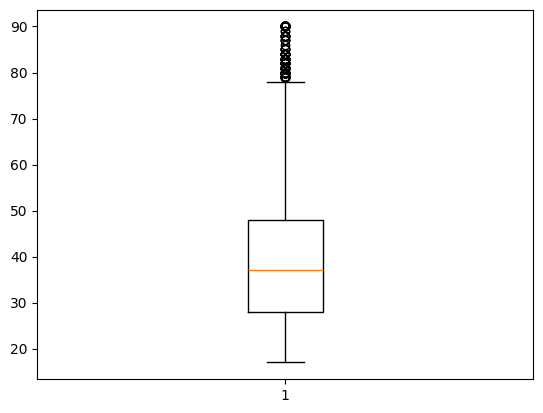

In [282]:
#outlier detection visualization
plt.boxplot(data['age'])
plt.show()

In [283]:
# Keep only records where age is between 17 and 75
data=data[(data['age']<=75)&(data['age']>=17)]

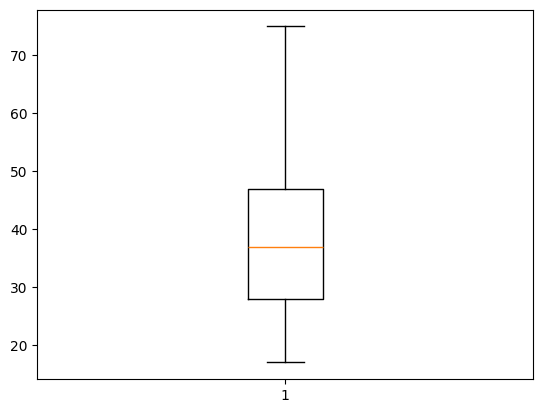

In [284]:
plt.boxplot(data['age'])
plt.show()

In [285]:
print(data['workclass'].value_counts())

workclass
Private             33756
Self-emp-not-inc     3796
Local-gov            3110
Others               2700
State-gov            1979
Self-emp-inc         1669
Federal-gov          1428
Name: count, dtype: int64


In [286]:
data.shape

(48438, 15)

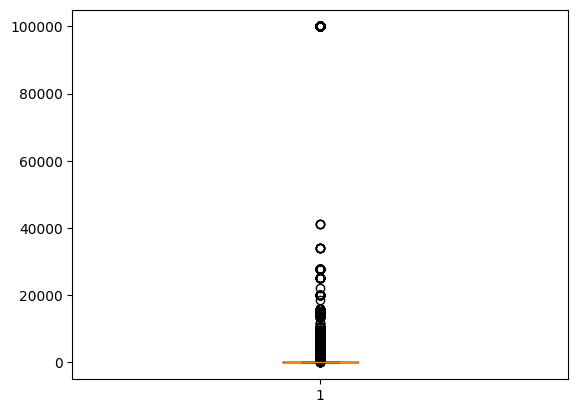

In [287]:
plt.boxplot(data['capital-gain'])
plt.show()

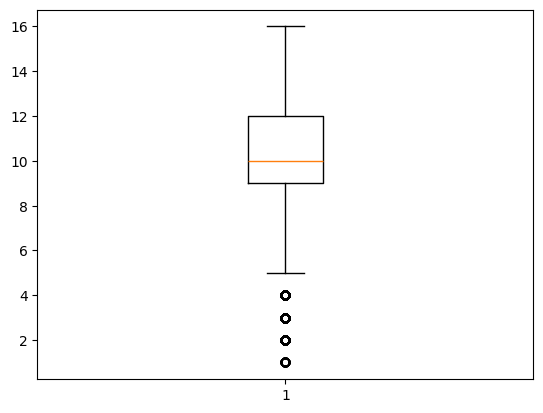

In [288]:
plt.boxplot(data['educational-num'])
plt.show()

In [289]:
# Keep only records where educational-num is between 5 and 16
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

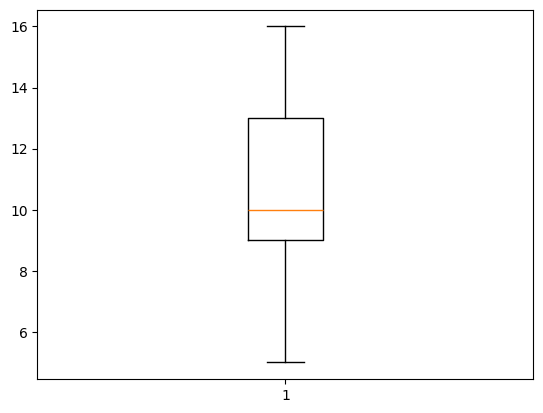

In [290]:
plt.boxplot(data['educational-num'])
plt.show()

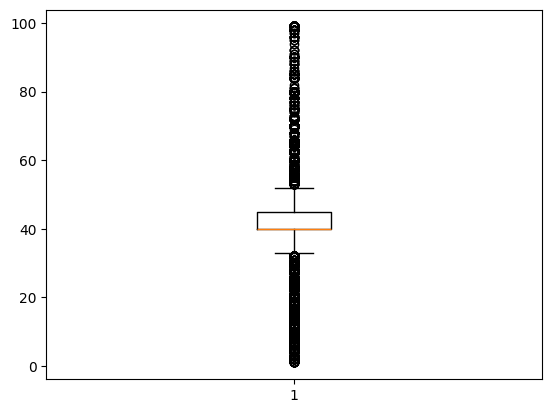

In [291]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [292]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [293]:
data.shape

(46720, 15)

## Feature Engineering

In [294]:
# Create new feature: experience
data['experience'] = data['age'] - (data['educational-num'] + 6)
data['experience'] = data['experience'].clip(lower=0)

In [295]:
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,experience
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,12
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,23
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,10
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,28
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K,2


### Label Encoding

In [296]:
# Encode categorical columns using LabelEncoder 

encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])#3 categories 0, 1, 2
data['education']=encoder.fit_transform(data['education'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])  
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [297]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,experience
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,39,<=50K,12
1,38,3,89814,8,9,2,4,0,4,1,0,0,50,39,<=50K,23
2,28,1,336951,4,12,2,11,0,4,1,0,0,40,39,>50K,10
3,44,3,160323,11,10,2,6,0,2,1,7688,0,40,39,>50K,28
4,18,2,103497,11,10,4,8,3,4,0,0,0,30,39,<=50K,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,4,12,2,13,5,4,0,0,0,38,39,<=50K,9
48838,40,3,154374,8,9,2,6,0,4,1,0,0,40,39,>50K,25
48839,58,3,151910,8,9,6,0,4,4,0,0,0,40,39,<=50K,43
48840,22,3,201490,8,9,4,0,3,4,1,0,0,20,39,<=50K,7


## Prepare Features and Target

In [298]:
# drop the unnecessary coulumn for tha model training
data=data.drop(columns=[ 'fnlwgt' ,'educational-num',
 'relationship' ,'race', 'capital-loss',
  'native-country','capital-gain',]) 

In [299]:
# Split data into features (X) and target (y)
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,education,marital-status,occupation,gender,hours-per-week,experience
0,25,3,1,4,6,1,40,12
1,38,3,8,2,4,1,50,23
2,28,1,4,2,11,1,40,10
3,44,3,11,2,6,1,40,28
4,18,2,11,4,8,0,30,2
...,...,...,...,...,...,...,...,...
48837,27,3,4,2,13,0,38,9
48838,40,3,8,2,6,1,40,25
48839,58,3,8,6,0,0,40,43
48840,22,3,8,4,0,1,20,7


## Apply MinMaxScaler

In [300]:
# Apply Min-Max Scaling to normalize feature values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.09090909, ..., 1.        , 0.39795918,
        0.1875    ],
       [0.36206897, 0.5       , 0.72727273, ..., 1.        , 0.5       ,
        0.359375  ],
       [0.18965517, 0.16666667, 0.36363636, ..., 1.        , 0.39795918,
        0.15625   ],
       ...,
       [0.70689655, 0.5       , 0.72727273, ..., 0.        , 0.39795918,
        0.671875  ],
       [0.0862069 , 0.5       , 0.72727273, ..., 1.        , 0.19387755,
        0.109375  ],
       [0.60344828, 0.66666667, 0.72727273, ..., 0.        , 0.39795918,
        0.578125  ]])

In [301]:
data.head(6)

,age,workclass,education,marital-status,occupation,gender,hours-per-week,income,experience
0,25,3,1,4,6,1,40,<=50K,12
1,38,3,8,2,4,1,50,<=50K,23
2,28,1,4,2,11,1,40,>50K,10
3,44,3,11,2,6,1,40,>50K,28
4,18,2,11,4,8,0,30,<=50K,2
5,34,3,0,4,7,1,30,<=50K,22


## Train-Test Split

In [302]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [303]:
xtrain

array([[0.39655172, 0.83333333, 0.72727273, ..., 1.        , 0.14285714,
        0.390625  ],
       [0.84482759, 0.5       , 1.        , ..., 1.        , 0.39795918,
        0.78125   ],
       [0.06896552, 0.33333333, 1.        , ..., 0.        , 0.39795918,
        0.078125  ],
       ...,
       [0.20689655, 0.        , 0.90909091, ..., 0.        , 0.55102041,
        0.125     ],
       [0.36206897, 0.5       , 0.90909091, ..., 1.        , 0.39795918,
        0.265625  ],
       [0.74137931, 0.16666667, 0.54545455, ..., 0.        , 0.55102041,
        0.640625  ]])

## Multiple Model Training

In [304]:
# Train and evaluate multiple models using pipelines
# Define a dictionary of models
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.7977
              precision    recall  f1-score   support

       <=50K       0.82      0.93      0.87      7038
        >50K       0.65      0.39      0.48      2306

    accuracy                           0.80      9344
   macro avg       0.74      0.66      0.68      9344
weighted avg       0.78      0.80      0.78      9344

RandomForest Accuracy: 0.8157
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      7038
        >50K       0.64      0.57      0.60      2306

    accuracy                           0.82      9344
   macro avg       0.75      0.73      0.74      9344
weighted avg       0.81      0.82      0.81      9344

KNN Accuracy: 0.8092
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.88      7038
        >50K       0.62      0.57      0.60      2306

    accuracy                           0.81      9344
   macro avg       0.74      0.73      0.

## Visualize model comparison

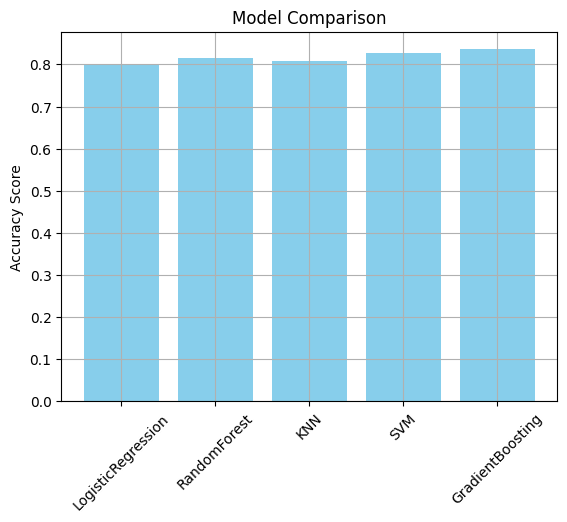

In [305]:
# Visualize model accuracy comparison using a bar chart
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [306]:
data.head(5)

,age,workclass,education,marital-status,occupation,gender,hours-per-week,income,experience
0,25,3,1,4,6,1,40,<=50K,12
1,38,3,8,2,4,1,50,<=50K,23
2,28,1,4,2,11,1,40,>50K,10
3,44,3,11,2,6,1,40,>50K,28
4,18,2,11,4,8,0,30,<=50K,2


## Save the best model

In [307]:

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save updated (encoded + cleaned) CSV
data = data.drop(columns=['income'])
data.to_csv("cleaned_data.csv", index=False)
print("✅ Saved cleaned data as cleaned_data.csv")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.7931
RandomForest: 0.8151
KNN: 0.8099
SVM: 0.8244
GradientBoosting: 0.8356

✅ Best model: GradientBoosting with accuracy 0.8356
✅ Saved cleaned data as cleaned_data.csv
✅ Saved best model as best_model.pkl
